In [1]:
import konlpy

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [3]:
import csv
f = open('final.csv','r', encoding = 'UTF-8-sig')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()

['0', '저 짧은 몇 마디에서 인성이 보이넴 ..', '1']
['1', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '1']
['2', '정신분열 잼 ㅋㅋㅋ', '1']
['3', '실력에비해 오래갔다', '1']
['4', '거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가?', '1']
['5', '점점... 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다', '1']
['6', '말하는거 저급해...', '1']
['7', '말투가 왜저래ㅋㅋ', '1']
['8', '아무리 그래도 그렇지 말투가 저게 뭐냐;', '1']
['9', '왜저래 비꼰데?? 힘들면 그냥 조용히 탈퇴하세요~ 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 ..다들 얼굴에 생기가 없고 초심도 잃은거 같고 ..배부르지?? 그만하고 쉬어라 다들 ..팬 많지? 금방 썰물처럼 다 휩쓸려간다 ~너희 아무것도 아니다~ 배부른 소리하고 자빠졌네 ~비호감이네 진짜', '1']
['10', '아무리봐도 잘못 뽑은 것 같다', '1']
['11', '인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참;;;', '1']
['12', '인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이', '1']
['13', '진짜 예민하네;', '1']
['14', '와...좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게....당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을....ㅉㅉ', '1']
['15', '윽..진짜 말투 이런다고???', '1']
['16', '말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 피코짓 하지말고 이제 힘든척 울지마 이 가식덩어리야', '1']
['17', '멘탈이 상당히 불안정한듯. 제발 말과 글을 자제하고 행동을 조심해주길....', '1']
['1

['1974', '찌질이', '1']
['1975', '히키코모리쳐럼 쳐박혀있는 은둔생활하면 인성도 ㅈ같이변함 와모랑은 별개임 딱 저놈이네 못먹고 은둔생활만할얼굴이란게 딱보임 존나 그늘져있고 몸도 말랐고 ㅋㅋ', '1']
['1976', '길거리 다니다가 뒷통수 벽돌로 박살나거나 집단으로 폭행당해도 감내해야되 알았지?? 이건 너가 시작한거야', '1']
['1977', '앞날이 암울하네', '1']
['1978', '새콤달콤 포도맛 씹다 뱉은거 같이 생겼네', '1']
['1979', '곧 사라질 관상 운명 같은데', '1']
['1980', 'ㅋㅋㅋㅋㅋㅋㅋㅋ 야이 씹얼 개소리 좀 안나게해라', '1']
['1981', '한남들 수준 ㄷ ㄷ 어휴', '1']
['1982', '정신나간것들이 한둘이 아니네~~너네 부모님은 이런거 아시니?', '1']
['1983', '니 얼굴이 더 아니거든??', '1']
['1984', '머야 욕즘 먹어보고싶은거야?ㅎ 여기 댓글 난리났네ㅎ 정신병자 쓰레기 ㅈㅅ해라ㅎㅎ 이거 읽으면서 무슨 생각할지 개궁금ㅎ', '1']
['1985', '저 진따는 어떻게 방송 나왔냐', '1']
['1986', '인물이왜그래 어디 갈았나? 얼굴도아픈거같고 정신도아픈것같구 니도참불쌍하다', '1']
['1987', '왜저리 못생긴 감자같이 생겼니 ', '1']
['1988', '말안해도 얼굴만으로도 충분히 어그로 끄니깐 닥치고 있어라', '1']
['1989', '몇대 쥐어박고 싶게 생겼네 불량감자 새퀴', '1']
['1990', '불량감자같이 생겻누', '1']
['1991', '도라이 쉑!!!! 그럴시간에 군대가라~~', '1']
['1992', '요다닮았네. 인생 못살겟다', '1']
['1993', '와 미쳤나봐', '1']
['1994', '존나한남..', '1']
['1995', '하여간  이나라는 쓰레기 천국 이다.  정상인 찾기 진짜  힘들다.', '1']
['1996', '진짜 미쳤다..', '1']
['1997', '물고기처럼 

['3742', 'ㅋㅋㅋ 진짜 관심종자 원탑이여..ㄷㄷㄷ', '1']
['3743', '진짜 이여자 면상좀 치워라', '1']
['3744', '사람 질리게 하는 스타일이네', '1']
['3745', '왜 자꾸 이 사람 기사가 나오는건지  소름끼치게 무서워요', '1']
['3746', '은퇴는 언제해?', '1']
['3747', '사람의 인격과 기본은가지고 살아기시길글구 안보고싶음', '1']
['3748', '정말  예의가 없는 분', '1']
['3749', '진짜 관종이다..하나도 안예쁘고 무섭다 정신세계 완전 독특한 사람. ', '1']
['3750', '이젠... 안예뻐 보이고 그냥.... 아파보인다 해야 되나? 그런 느낌... 건강한 느낌은 아님...', '1']
['3751', '하루에. 한번씩. 올라오네  이쁘다는. 기준이 뭔지.... 나의 미의 기준은. 김태희. 한가인 송혜교 이지만', '1']
['3752', '소름;;;;', '1']
['3753', '도대체 어디가 어떻게 이쁘다는건데??!!!!!내눈이 이상한건가????ㅋㅋㅋㅇㅋㅋ뽀샵저렇게해놓고~~ㅋㅋㅋㅋ', '1']
['3754', '무서워 이제ㅠ', '1']
['3755', '마음이 예뻐야지ㅠㅠ', '1']
['3756', '마음이 이뻐야지 자기 억울하다고 독기품고 상대 잘못되길 바라는 마음부터 고치고 얼굴 이쁜걸 자랑하거라', '1']
['3757', '볼수록 환자같노', '1']
['3758', '저 영혼없는 눈동자...', '1']
['3759', '연기도 못하는', '1']
['3760', '안궁금합니다.. 사진 올리지마셍.스미마셍.', '1']
['3761', '은퇴ㄱㄱ', '1']
['3762', '나만 무섭냐 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 사진 저렇게 찍는거 너무 무서워', '1']
['3763', '미저리', '1']
['3764', '어디가  이뻐요???  글구  어디 불려주는데두 있나보네요.  헐~  놀라와라~~~', '1']
['3765', '안예쁘네', '1']
['3766

['4973', '누가 머래도 내 워너비ㅠㅠㅠ졸라예쁨ㅠ', '0']
['4974', '너무 예쁘더라 흑흑 언니가 많이 좋아해 ㅠ', '0']
['4975', '이쁘고 인성도 좋고~~항상 응원해', '0']
['4976', '진짜 이쁘다', '0']
['4977', '아름다워라', '0']
['4978', '고급스럽다', '0']
['4979', '뷰티나', '0']
['4980', '여전히 이쁘네 저 여신머리 왤케 잘 어울리냐', '0']
['4981', '나날이 갈수록 더 예쁘다', '0']
['4982', '이야 사진 하나 올렸다고 이런 관심 참 감사합니다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 역시 대스타 ', '0']
['4983', '청순여신', '0']
['4984', '부럽', '0']
['4985', '이번생에 실물로 보고 죽을거야ㅠㅠㅠㅠㅠ그래도 건강 잘 챙겨요 너무 마르면 골다공증온다구요 무대에서 많이보고싶어요ㅠㅠㅠㅠ', '0']
['4986', '너무이뻐 ..얼굴도얼굴이지만  성격이 털털', '0']
['4987', '배가본드 빨리 보고 싶다고 이쁜 수지야', '0']
['4988', '수지언니 너무 예쁘다', '0']
['4989', '아 진짜 너무 예쁘고 귀여워ㅠㅠ', '0']
['4990', '최고의 여신', '0']
['4991', '역시 존예', '0']
['4992', '더 이뻐진듯^^기대해요', '0']
['4993', '곧 볼수있겠지?빨리 보고푸당^^ 항상 응원해', '0']
['4994', '최고', '0']
['4995', '개미허리는 아니지만 넘 이뿌당 같은 여자가 봐도 뭔가 수수하면서 사랑스럽달까', '0']
['4996', '여쁘네', '0']
['4997', '사랑해', '0']
['4998', '다이어트 했네^^항상 이쁘지만 오늘은  더 이뽀', '0']
['4999', '오늘도 미모 폭발  빨리보고싶어요~', '0']
['5000', '이뽀~~~~~', '0']
['5001', '예쁘다아~~', '0']
['5002', '예뻐요~~자주

['6973', '곧 있으면 비즈니스 동반자살시도 까지 하겠군. ㅋㅋㅋㅋㅋ', '1']
['6974', '종나 웃긴게 유아인 게이라는 확신도없는데또 게이라 쳐도 존나 저격하더만ㅋㅋㅋㅋㅋ 지는 동성연애중ㅋㅋㅋㅋㅋ 엮겹다 이중성 ㄹㅇ 관심은 관심대로 다끌다가', '1']
['6975', '걍정신병자', '1']
['6976', '그냥 정신나간 녀ㄴ들', '1']
['6977', '그냥 약이나해라', '1']
['6978', '얘는 원래 살짝 맛이 간건지 약 때문에 맛이 간건지 모르겠다. 암튼 결론은 진짜 관종 중의 관종.', '1']
['6979', '꼴깝한다아주', '1']
['6980', '개징그러움', '1']
['6981', '레알 씹관종...... 기사 올라올때마다 인스타질 ㅎㅎㅎㅎㅎㅎ', '1']
['6982', '이런 개똥 같은 내용 알고싶지 않아요 기사 올리지 마여 내 정신까지 이상해지네??', '1']
['6983', '지랄도풍년이여~ㅋㅋ', '1']
['6984', '그냥 정신이상같아요..', '1']
['6985', '아니ㅜㅜㅜ  여자끼리 사귀는게 문제는 아닌데 그럼 그냥 인정하던가 어떻게든 더 이슈화 되고 싶어서 부인했다가 인정하고ㅋㅋㅋㅋ 너무 관종같아서 별로임', '1']
['6986', '정말 진지하게 전부터 느꼈어요. 병원 치료 받아 보세요.', '1']
['6987', '정신병 있는듯..?', '1']
['6988', '에혀~한서희 부모님은 뭐하시나?? 자식이 저렇게 살아도 그냥 나두나??부모님이 불쌍타', '1']
['6989', '정체성이 어쩌고 동성이 어쩌고 난 일종의 정신병으로 본다. 어릴 적 집안환경으로 인해 사람에 따라 폭력적으로 변하거나 뭐 이런 것들 ..... 진심 역겹고 토나온다 ..... 인정해달라는 정신병자들  무섭', '1']
['6990', '얘네들 기사좀내려 무관심 속에 굶어봐야함', '1']
['6991', '진짜 미친여자 구나', '1']
['6992', '그냥....기사를 써주지마요  허언증에 언론낭비하는

['8972', '멋지다', '0']
['8973', '넘 멋져용', '0']
['8974', '멋지다 멋져', '0']
['8975', '프로다운 노력과 열정에 박수를!!! 완벽하', '0']
['8976', '대박', '0']
['8977', '완전 멋있잖아 관리의 끝', '0']
['8978', '정말 멋지네요!!자기관리의 끝판왕??', '0']
['8979', '멋있네요.아름답다', '0']
['8980', '멋있다  진짜', '0']
['8981', '진심 짱이다', '0']
['8982', '프로다 프로', '0']
['8983', '조각이네요~~', '0']
['8984', '??멋쪄요♥?', '0']
['8985', '진짜멋있다', '0']
['8986', '대단해.. ', '0']
['8987', '진짜 자기관리 존경스럽네요^^ ', '0']
['8988', '멋짐 폭발~~~♥', '0']
['8989', '와~~~~ 넘 이뻐 이뻐', '0']
['8990', '굿굿', '0']
['8991', '진짜 빛이나네요', '0']
['8992', '정말멋지네요', '0']
['8993', '근데 너무 멋지고 노력이 감탄스러울만큼 존경스럽네요~~ 응원합니다.~', '0']
['8994', '멋지네요', '0']
['8995', '멋지네요   응원합니다', '0']
['8996', '멋지다~~~', '0']
['8997', '멋있다!!!!', '0']
['8998', '존경합니다.', '0']
['8999', '정말 멋지십니다ㅡ', '0']
['9000', '대박 멋집니다.', '0']
['9001', '정말 멋있다..', '0']
['9002', '멋있다.이쁘다.프로다.', '0']
['9003', '너무 멋져요ㅜㅜㅜㅜ 기크아ㅠㅠㅠㅠ존멋ㅠㅠㅠ', '0']
['9004', '정말 환상적이네요', '0']
['9005', '넘 멋져요^^', '0']
['9006', '와우~??????????', '0']
['9007', '와..멋지다!! ', '0']
[

['10972', '얼굴이 예전과 달라 보이긴함.난 이전보다 더 못한거 같은데ㅜㅠ', '1']
['10973', '얼굴보여주려고 연예인하는건데...외모관심줬다고 고소라...ㅡㅅㅡ...못생겼다고한것도아니고 얼굴변했으니 성형아니냐 의문들 갖는건데', '1']
['10974', '어리고 이쁜 연예인들 그렇게 악플쳐달고 못살게 굴다 보내더니 아직도 이러고 있네 왜이렇게 악플을 쳐다는거냐 대체 무슨 죄지은것도 아니고 하 끔찍하다 진짜', '1']
['10975', '관심없었는데, 안티될 것 같아요', '1']
['10976', '누굴 장님으로 아나? 딱 봐도 성형 했구만~!', '1']
['10977', '까칠하긴. 그러니 팬심이 등돌리는거다.예쁘다는 소리군..으로 받아들이면 될것을..', '1']
['10978', '내 눈이 이상한 걸로 합시다.', '1']
['10979', '입꼬리 이마 미간 굉장히 부자연스러운데....;;', '1']
['10980', '징그러워보이는데::', '1']
['10981', '눈 어쩔~~', '1']
['10982', '했눈데', '1']
['10983', '했음 했다 그래라다~~~~티나는구만.', '1']
['10984', '성형했구만 했음 했다하지 뭘 그런걸로 법적대응타령이냐 그럴거면 면상들이밀지말고 걍 찌그러져있어라', '1']
['10985', '징그러운데 ‥', '1']
['10986', '원래도 한 얼굴이었는데 머', '1']
['10987', '아니시밤얼굴이 그전과 다르니 성형설나온건데무슨 악의적이고 고소드랍이냐?눈깔이 삐었냐? 누가봐도 이상해졌구만', '1']
['10988', '했고 안했고를 떠나 너무 이상해졌다 ㅠㅠ 홍수아 같기도 하고.. 썸바디2 김소리가 황정음 닮았다 생각했는데 김소리가 훨씬 이쁘네...', '1']
['10989', '사진보고 성형한거 같다고한게 악플이냐? 딱봐도 사진 이상하구만. 대중이 사진보고 판단하지 니 실물을 어찌보니? 법적대응 참으로 웃기는 짬뽕일쎄~~~', '1']
['10990', 

['12971', 'ㄱㄹ들', '1']
['12972', '노출증같은데ㅋㅋ굳이  삐젹꼬라서 이쁘지도않고만', '1']
['12973', '놀고있네', '1']
['12974', '주류 있으니 깠다?무슨 유흥업소도 아니고ㅠ', '1']
['12975', '자신들이야  뭔생각인지는 모르겟지만  보는 우리는  걍  싼티...  그뿐임', '1']
['12976', '가창력이나 공부해! 맨날 드럽게 벗고나오지말고.스트립걸이냐?', '1']
['12977', '당당한 해명이 아니라 무개념같다. 저 싼티나는 행동이 무대 퍼포먼스라고??', '1']
['12978', '둘다 천박해 보인다. 몸뚱아리  니들 마음대로 드러내고 다닐꺼면  다 벗고 다니지,  옷은 왜 입고 다니냐? 그렇지 않아도 한국은 성관련 범죄에 관해 남자들이 예민한데', '1']
['12979', '천박 싼티 작렬 ㅉ ㅉ왜들 그러냐~', '1']
['12980', '더럽고 보기싫어', '1']
['12981', '우스워보이고..왜저래', '1']
['12982', '갈수록 비호감', '1']
['12983', '보는이를 무시한 더러운행동! 남자들이 좋아할꺼라는 착각인거지...싼티뇬', '1']
['12984', '엉덩이근육도 없고 쳐짐 할머니 엉덩이', '1']
['12985', '또롸이들', '1']
['12986', '퍼포먼스라고는 하지만.현아는, 이미지가 너무굳어버려서 안타까운케이스...제시는..얼굴은안되지만 몸매가되니..노출증같고...', '1']
['12987', '죄송하지만 더러워요', '1']
['12988', '야 그냥 화끈하게  벗어버려~~     감질나는 싼티보다 낫지 않겠어?', '1']
['12989', '각자 생각의 차이겠지만 너무 천해보인다.', '1']
['12990', '더럽다  그렇게 보여주고싶나? 그냥 벗고다녀!', '1']
['12991', '얘 요새 정신나간거 같음..  남친도 뭔 듣보잡이든데 사진보면 약한사람마냥 늘 퀭하고.. 패왕색패왕색 해줫더니 선넘고있음 점점 싸보

['14971', '보고싶었습니다 이렇게 다시와서 존재를  알려주니 정말 좋습니다^^앞으로도 활동 많이 하시고 쭈~~~~욱  ♡', '0']
['14972', '볼수록 매력에 빠져드네요. 돌아와주셔서 감사합니다.  말한마디 한마디가 아트네요. 왕성한 활동 기대하고 기다릴께요', '0']
['14973', '우리곁에 와주신거 감사합니다 항상 응원합니다', '0']
['14974', '응원합니다 행복하세요..팬도 즐겁네요 ㅎ', '0']
['14975', '이젠 매일매일 행복만 하세요', '0']
['14976', '작년 연말 당신을 알고 올해초까지 참 행복합니다', '0']
['14977', '덕분에 중년이후 삶의 생기를 찾았어요  그동안 몰라봐서 넘 안타까워서 ;;이젠 평생 같이 갈겁니다! !!', '0']
['14978', '말속에 따뜻함이 있네요  스스로도 고마움을 잊지 않으려하고', '0']
['14979', '보고 있으면 나까지 맑아지는것 같다', '0']
['14980', '좋은 영향력  감사합니다', '0']
['14981', '좋은 외모 좋은 성품 훌륭한 퍼포먼스 빨리 콘서트 해주세요', '0']
['14982', '좋은 인성을 가지신 덕분에 좀 늦었지만 지금이라도 빛을 보시는 거 같아 기분이 좋네요~', '0']
['14983', '좋은일만 있을겁니다', '0']
['14984', '좋구나 좋아', '0']
['14985', '존잘이고 말도 청산유수임', '0']
['14986', '생각도 깊고 겸손하며 꾸밈없이 있는 그대로 얘기하는 모습이 너무나 인상 깊었음♡나도 닮고싶다..♡', '0']
['14987', '제대로 입덕했어요', '0']
['14988', '정말 진심이 느껴져 반하고 또 반합니다^^', '0']
['14989', '정말 너무 늦게   우리 곁에 온거 같아 아쉽지만 지금이라도 이 바른사람  천사같은 사람이 잘됬으면 좋겠어요~연예계도 착한사람이 잘되는 곳이였으면~', '0']
['14990', '정말 돈많이벌어서 산타크로스같은 삶

['16970', '꿀잼..기다린 보람이 있네요..다음주가 기대된다는..', '0']
['16971', '꿀잼~~', '0']
['16972', '꿀잼ㅋㅋㅋㅋ 일요일마다 본방사수해야징', '0']
['16973', '나름 케미가 잘맞네', '0']
['16974', '난 기대 1도 안했는데 의외로 재미있네~  담주도 기대해요', '0']
['16975', '난 너무 예뻐보이던데~..  열심히하고.. 속도 깊어보였음! ㅎㅎ 담주도 본방사수!!!!!!!!!', '0']
['16976', '난 생각보다 볼만했는데.', '0']
['16977', '난 재미있게 봤는데~', '0']
['16978', '난 재밌게 봤는데..ㅋ  앞으로 어떨지 왠지 기대가 되네요~~^^', '0']
['16979', '난 재밌던데ㅎㅎㅎ', '0']
['16980', '난 잼나게 봤음 ㅋㅋ 특히 연정훈 의왜로 구탱이형 필 난거  같아', '0']
['16981', '난진짜재밌던데 ㅋㅋㅋ', '0']
['16982', '너무  재미있어요^^~~', '0']
['16983', '너무 기다렸다오~~~쭉...가즈아~~~^^', '0']
['16984', '너무 웃겼어요. 여섯명 모두 순둥멤버들이라 담주 더 기대 되고 그래요~ 여성피디님 화이팅! 1박 2일 화이팅!', '0']
['16985', '너무 재미있게 잘 봤어요 멤버들 합도 좋은거 같아요앞으로도 더 재밌게 부탁 드릴게요~', '0']
['16986', '너무 재미있어요 연정훈씨 팬인데 매주 볼수 있게되서 너무좋아요 ㅎ', '0']
['16987', '너무 재미있어요!!!!', '0']
['16988', '너무 재미있어요모두들 열심히 하는모습 좋아요 화이팅', '0']
['16989', '너무 재미있었어요~~초등딸이라 봤는데 둘이서 계속  웃었네요~~^^담주~~완죤 기대~신규 멤버들 짱입니다!!!', '0']
['16990', '너무 재미있었음~', '0']
['16991', '너무 재미있음~~다음주 기대돼요.', '0']
['16992',

['18970', '제일 재밌다. 최고입니다. ^^', '0']
['18971', '쪼아~~~^^', '0']
['18972', '노래도 잘하고 말도잘하고 딱부러졌어', '0']
['18973', '진짜 똑똑한거 같다. 도경완같은 남자를 고른거보면.. 그냥 무난하게 잘 살거 같다 평생~~', '0']
['18974', '재미없음 보지말고 기사도 보기도 싫어', '1']
['18975', '재미있게 잘 보고 있고 항상 응원합니다  행복하세요 ~~^^', '0']
['18976', '재미있게 잘 보고 있어요~^^', '0']
['18977', '저것도 자랑 이라고 쯧쯧!  시댁을 무시하는 저 짓꺼리. 장윤정.', '1']
['18978', '딸이너무이뻐요 성격도좋을것같구요하영이보고싶네요', '0']
['18979', '저는슈돌보면서 팬이 돼었습니다?순수한모습들이??보는이도 행복해집니다', '0']
['18980', '정말 잘 어울리고 보기좋은 가족들', '0']
['18981', '제발 찌그러져 살아라 좀나대지 말고 니얼굴 보는거 불편한사람 있다', '1']
['18982', '좋아요  이 부부  사랑이  보여요♡♡', '0']
['18983', '진짜 결혼생활의 표본 아닐까요ㅎ 너무 보기좋아요', '0']
['18984', '집에서 뒹구는데 화장이 뭐래요.ㅋ 보기좋고 이뻐요', '0']
['18985', '참  보기좋은 부부야', '0']
['18986', '참 ~이쁜부부연우~하영이   너무귀엽고  사랑스러워요~~늘 응원합니다♡행복하세요~♡♡♡', '0']
['18987', '참 행복하게 잘 지내는듯 ㅎㅎㅎ', '0']
['18988', '참보기좋은 부부', '0']
['18989', '참예쁜 부부~^^', '0']
['18990', '천생연분 같음.', '0']
['18991', '첨엔 연출이라 생각했는데점점 호감이 가는 집이네요~네가족 완전 사랑스러워용~^^', '0']
['18992', '최고부럽다!', '0']
['18993', 'ㅋㅋㅋㅋ요즘 이 부부랑 

['20822', 'ㅉㅉ 이래서 딴따라는 어쩔 수 없나 보다', '1']
['20823', '으 떠라이', '1']
['20824', '팬은 배운사람인데 배우는 딴따라라 그런가...머갈통이 쫌..', '1']
['20825', '기자가 사진 코 많이 티나는사진을 올렸네 .성형많이 해서 전얼굴이 싫었나보다', '1']
['20826', '대상소감때  울먹이는것도 억지 울음 짜내는거 너무 티나더니 ㅉㅉ', '1']
['20827', '지가 뭐라고 ㅋㅋ 인성 저런지 몰랐다 진짜', '1']
['20828', '한방에훅가야지뭘믿고저러냐쿨한거라고생각하나부네팬심인데 굳이비호감전락', '1']
['20829', '안돼요? 안되나요?가 맞다.. 머리가비었납네', '1']
['20830', '성형전도 후도 자기얼굴이거늘 성형하지말던가', '1']
['20831', '여자 인간성 제로네', '1']
['20832', '싸가지 ㅊㄴ없네', '1']
['20833', '늙은30대중후반 한녀들 보다는 어린 베트남여자가 25만배 낫다고 생각합니다...쩝어제 늙은 37살 한녀 만났는데 웃으니 얼굴에 주름이 찌글찌글 ㅜㅜ', '1']
['20834', '면상 참 존못이다..문신충이네..', '1']
['20835', '동백아~ 까불지마', '1']
['20836', '배가 불렀군 ㅉㅉ 구속하라!!', '1']
['20837', 'ㅁㅊ', '1']
['20838', '자연스럽게 빠진 살이 아니라서 ...불쾌해요', '1']
['20839', '진짜 대한민국 여배우 어지간히도없나보다 쩌리였던게 월클행사나하고있고 ㅋㅋㅋㅋ 이영애 김희선 최진실 트로이카 시절이면 저런건 조연따리도 아까운 수준인데 ㅋㅋㅋ이번 논란은 그렇다치는데 쟤는 생긴것도 평범하고 연기도 별거없더만 왤케 거품이 생긴거임? ㅋㅋㅋ 어이가없네 ㅋㅋㅋ', '1']
['20840', '이래서 분칠한 것들은...ㅉㅉㅉ', '1']
['20841', '재수없네 진짜. .저기 어디서 화날부분이 있는데?', '1']
['20842', '동백꽃

['22006', '예뻤는데 성형을 왜 ㅠ 성형 보니 정신적으로도 불안해 보이는데 그걸로 또 악플받고 악순환이여', '1']
['22007', '어플사진 진짜 싼티 난다. 저렇게 찍어 올리는게 예쁘다고 올리는건지...그냥도 예쁠텐데. 굳이...하리수도 맨날 저러던데', '1']
['22008', '얼굴 너무 멀리갔구나', '1']
['22009', '심하네 얼굴이', '1']
['22010', '성형인의 대표적인 사마귀상', '1']
['22011', '완죤성형???ㅡㅡㅡ', '1']
['22012', '너무 고쳤네요..완전 딴사람 인데요...', '1']
['22013', '누군지 못알아 볼뻔', '1']
['22014', '얼굴좀치워 안궁금하고 역겨워', '1']
['22015', '빗살무늬 토기', '1']
['22016', '하리수?', '1']
['22017', '신석기시대 유물 빗살무늬토기', '1']
['22018', '턱 어디갔냐ㅜㅠㅠㅠㅠ', '1']
['22019', '얼굴 좀봐 ㅋ 외계인??? ㅋㅋㅋㅋ', '1']
['22020', '성형은 과학이다', '1']
['22021', '얼굴이 왜저리 됐는지...얼굴을 넘 심하게 깎은듯...전에 모습이 훨 이쁜데', '1']
['22022', '중국인같다 ㅋㅋ', '1']
['22023', '이마 눈 턱 뭔데???? ㅋ', '1']
['22024', '얼굴이 너무 변했음', '1']
['22025', '턱 심하게 깍았네;;;', '1']
['22026', '텐프로는 아니겠지..누가 성괴랑 술마시고 싶겠어', '1']
['22027', '이마랑 턱은 어쩔......ㅜㅜ', '1']
['22028', '얼굴 진짜 개재수없네ㅋ', '1']
['22029', '벗고 지럴 하니 자업자득이지 ㅎㅎ 멀 흥분해서 그래 도둑이 지 발 저리지 한국년들 그냥  다 스폰 받아서 사는거 다 아는 사실인걸', '1']
['22030', '윤곽을 뒤집어지게 했넹', '1']
['22031', '이 분 까지마라. 누드집도 내주

['23968', "너의 멍청함에 '깜짝'", '1']
['23969', '이야아~ 젖이 크고 탱탱 ㅎㅎ 양현석도 흐뭇해할듯', '1']
['23970', '수준하고는 ㅉㅉ', '1']
['23971', '이리 형편 없는거 참으로 유감이다.', '1']
['23972', '진짜 저질이네', '1']
['23973', '저질스러움이 듬뿍 ~~', '1']
['23974', '그애비에 그딸', '1']
['23975', '슴가♡', '1']
['23976', '진짜 쓰레기같다', '1']
['23977', '진짜 ㅡㅡ더러워', '1']
['23978', '싫다 저 여자 아버지도', '1']
['23979', '정말 큼직하시네요', '1']
['23980', 'ㅎㅎ무슨 글래머래ㅎㅎ 가슴만 크면 글래머냐~~', '1']
['23981', '저질스럽다...', '1']
['23982', '노출영화 찍을려고 저러나', '1']
['23983', 'ㅋㅋㅋ  아빠 빽으로 연예인되겟다고ㅋㅋㅋㄱㄱㅋㅋㅋㄱ존나 너못생겼어요 ~~', '1']
['23984', '최현석 꺼져 극혐 왜케 나와서 딸 뭥미 웬 행세', '1']
['23985', '아버지가  싫어  관종같고 쫌스러워보이고', '1']
['23986', '얘 이미 c컵 참인거 예전에 나왔잖냐. 꽉찼던데', '1']
['23987', '드럽다', '1']
['23988', '하등한 유전자야 ??????????????????', '1']
['23989', '머하나 재능도 없이 아빠찬스 ㅎㅎ', '1']
['23990', '정신수준이 초딩보다 못하구나ㅉㅉ', '1']
['23991', '누군지 관심없는데;; ㅇㅉㄹㄱ', '1']
['23992', '아빠 스펙으로 뜨고 딱 거기까지인 연예지망생', '1']
['23993', '전혀모델감이아닌데', '1']
['23994', '기생충이 따로없네ㅉㅉ', '1']
['23995', '연예인은 이래서 천박한 집단이란거임 아버지도 티비 많이 나오는 사람일텐데 이런거 아빠가 보면 어떻겠냐? 안

['25968', '진짜 고맙 ㅠㅠㅠㅠㅠㅠ', '0']
['25969', '진짜 궁금한데 마스크는 어디서 사서 기부 하는거지?', '0']
['25970', '진짜 너무 고맙다.. 정말...', '0']
['25971', '진짜 너무 멋있네요... 대단', '0']
['25972', '진짜 너무 멋있으세요', '0']
['25973', '진짜 대단하다... 너무 멋있음', '0']
['25974', '진짜 대통령보다 더 대단하네 멋지다.', '0']
['25975', '진짜 마스크 비싸서 살 엄두도 안 나는데 좋은 일 했네', '0']
['25976', '진짜 멋있다ㅠㅠㅠ', '0']
['25977', '진짜 멋있어요 !!!!!!!', '0']
['25978', '진짜 멋지다!!!!!', '0']
['25979', '진짜 멋진 배우네요', '0']
['25980', '진짜 시기적절한 선행이다 팬될것같아요ㅜㅜㅜ', '0']
['25981', '진짜 연기 잘하고 웃는것도 아름다운데 인성까지 좋네 진짜 이런 배우 몇 안된다 ㅠㅠ 멋있어요 ㅠㅠ', '0']
['25982', '진짜 예뻐서 호감이었는데마음도 예쁘네요. 감사합니다!', '0']
['25983', '진짜 잘 했다.', '0']
['25984', '진짜 제일 필요한 걸 중요한 시기에 딱 기부하다니 멋있다', '0']
['25985', '진짜 좋은 일 했네!! 김고은파이팅!!', '0']
['25986', '진짜 착하다 자국민을 위해 기부하는게 대단해', '0']
['25987', '진짜 천사급;;', '0']
['25988', '진짜 훈훈하다 훈훈해.... ㅠㅠ 감동..', '0']
['25989', '진짜 훌륭하다. 돈 많아도 베풀기 쉽지않지. 돌아돌아 본인에게 빛이되어 돌아갈것', '0']
['25990', '진짜감사해요, ,  나도 마스크값이 부담스러운데 나보다 더힘든사람들은,  어쩔까, ㅠ걱정됐지만 암것도 할수가없었는데 ㅠㅠ 진짜고맙네요ㅠ', '0']
['25991', '진짜마음까지예쁘네 부디 중간에

['27775', '감독상 뉴스에 믿기지 않아서 다른 뉴스도 찾아보고 내가 잘 못본건가하고 너무 뭉클.... 2002년 월드컵 이후로 이런 뭉클함 오랫만이네요 축하합니다 봉 감독님!', '0']
['27776', '감독상 대단하다', '0']
['27777', '감독상 대박', '0']
['27778', '감독상 대박!!!!!', '0']
['27779', '감독상 발표순간 저도 모르게 아들이랑 환호성을 질렀네요~ 너무 자랑스럽습니다저도 오늘 치맥달립니다~', '0']
['27780', '감독상 발표할때 봉준호 하는 순간 소름이..... 멋져요', '0']
['27781', '감독상 봉준호 이름 부르는데 완전 소오름 쫙!! 축하합니다!!!!!!', '0']
['27782', '감독상 봉준호 호명에 소름이~~~', '0']
['27783', '감독상 소오름 ㄷㄷ 아시아계는 이안 이후로 처음임', '0']
['27784', '감독상?! 대박인데', '0']
['27785', '감독상까지 대박 !', '0']
['27786', '감독상까지... 기사 보고 소름 돋긴 처음이다. 정말 축하드립니다!', '0']
['27787', '감독상에 호명에 봉준호 이름이 나오자 전기충격받은것처럼 정신이 아찔했다. 아시아의 영광이자 대한민국의 자랑ㅇ다. 축하합니다 봉감독님', '0']
['27788', '감독상에서 너무 놀랐다.눈물이 나네.한국인들 개개인들은 이리 우수하구나. 그래서 더 슬프다.정말 나라만을 국민만을 사랑하고 아끼는 좋은 대통령이 나와서 한국인임을 자랑스럽게 해주면 좋겠다', '0']
['27789', '감독상은 시상식 최고의 상인데 장난아니다ㅜ', '0']
['27790', '감독상은 진심 소름', '0']
['27791', '감독상은 진짜 대상급 상임...', '0']
['27792', '감독상이랑 작품상을 같이 주는 경우는 많아도 각본상에 감독상주고 작품상까지 주는건 아니지ㅋ각본상만으로도 영광인데 사실 외국영화로 감독상까지 받은건 최초이자, 충격적인 거임.',

In [4]:
dic = pd.read_csv('new_file.csv',encoding = 'UTF-8-sig')
dic[:5]

0  \
0  1   
1  2   
2  3   
3  4   
4  5   

  요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다  \
0                             저 짧은 몇 마디에서 인성이 보이넴 ..                                  
1           개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ                                  
2                                         정신분열 잼 ㅋㅋㅋ                                  
3                                         실력에비해 오래갔다                                  
4  거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...                                  

   1  
0  1  
1  1  
2  1  
3  1  
4  1

In [5]:
dic.columns = ['0', 'comment', 'label']
dic[:5]

0                                            comment  label
0  1                             저 짧은 몇 마디에서 인성이 보이넴 ..      1
1  2           개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ      1
2  3                                         정신분열 잼 ㅋㅋㅋ      1
3  4                                         실력에비해 오래갔다      1
4  5  거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...      1

In [6]:
comment_data = dic[['comment','label']]
comment_data[:5]

comment  label
0                             저 짧은 몇 마디에서 인성이 보이넴 ..      1
1           개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ      1
2                                         정신분열 잼 ㅋㅋㅋ      1
3                                         실력에비해 오래갔다      1
4  거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...      1

In [7]:
print(len(comment_data)) # 댓글 개수 출력

29117


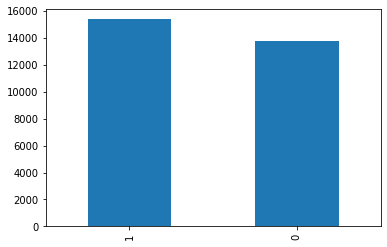

In [8]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [9]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 29117
rating개수: 29117


# 불용어 제거 및 토큰화

In [10]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

['저 짧은 몇 마디에서 인성이 보이넴 ', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '정신분열 잼 ㅋㅋㅋ', '실력에비해 오래갔다', '거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 ']


In [11]:
comment_data.comment = normalized_text
for sentence in comment_data['comment']:
    print(sentence)

저 짧은 몇 마디에서 인성이 보이넴 
개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ
정신분열 잼 ㅋㅋㅋ
실력에비해 오래갔다
거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 
점점 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다
말하는거 저급해 
말투가 왜저래ㅋㅋ
아무리 그래도 그렇지 말투가 저게 뭐냐 
왜저래 비꼰데 힘들면 그냥 조용히 탈퇴하세요 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 다들 얼굴에 생기가 없고 초심도 잃은거 같고 배부르지 그만하고 쉬어라 다들 팬 많지 금방 썰물처럼 다 휩쓸려간다 너희 아무것도 아니다 배부른 소리하고 자빠졌네 비호감이네 진짜
아무리봐도 잘못 뽑은 것 같다
인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참 
인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이
진짜 예민하네 
와 좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게 당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을 ㅉㅉ
윽 진짜 말투 이런다고 
말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 피코짓 하지말고 이제 힘든척 울지마 이 가식덩어리야
멘탈이 상당히 불안정한듯 제발 말과 글을 자제하고 행동을 조심해주길 
맨날 표정관리못하고 기분에따라 행동하고그리고 그만 우세요 
말은 조심히 써야 된다고 본다 그런 말투라면 모든행동이 가식적으로 느껴질거 같다 
어차피 이래저래 이미지 다 망가졌는데 열심히 쉴드 쳐라ㅋㅋㅋㅋㅋㅋ
인성 보소 
요즘 얘네 무슨 특권의식이 이렇게 심한지 모르겠음 회사 인성관리 한다고 하지 않았나 
깨진 건 너 얼굴이다
개돌았네
아 싼티나
언행이 참 가벼워보이네 ㅋㅋ 그렇게 안봤는데 벌레보이면 무시했어야지 똑같이 벌레짓 하고있으니 ㅉ
죽어ㅇㅇ 도움안되는 쓰레기
싸가지 없을거 같네
인기도별로없으면서 
깨진건 너 와꾸뿐 
왜 인기있는지

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



관종하나 또 나왔네
주둥 아리에 박음질 해라
머리에 든게 없냐
진짜 사람인가ㄷㄷ
야 너도 살다가 죽을수도 있는데 왜 사는거야 ㅋㅋ
관종 
저런걸 방송에내보내는게 모욕임
아기 공룡 둘리 아빠 컨셉 인가 보다 많이 닮았다 
진짜 얼굴 하 관심끌라고 별짓다하네
인성쓰레기
얼굴도 존나 빻았네 ㅋㅋ
집에 거울이 없나봅니다
세상은 넓고 또라이는 많구나 
웬만하면 외모 이야기 안할려고 했는데 정말 못생겼네 
넌 진짜 쓰레기야 인간성 개쩌네 
진짜 밥맛없게 생겼는데 하는짓도 말하는것도 ㅂㅅ 
옷도 어디서 개찐따처럼 입고나와서 ㅋㅋㅋㅋㅋㅋㅋ
거울 좀 보고살아라 
곰곰히 생각해 봤는데 영화 가 떠오르더라
잘생기면 얼굴값이라고나 하지 꼴값하네
이번에도 또느끼고 갑니다 역시 사람은 생긴대로 노네 
사람탈 쓰고 동물보다 못한 생각을 가지고 있으니 ㅉㅉ
그러니까 니 와꾸가 크흠 말을 말자
화생방 하고 나온 동기들 전부보다 못 생긴건 첨이네
넘 못생긴거아님 원래 저리 생겼음 
와 저색이 뭐가 저따구로 생겼냐 
아 진짜댓글안다는데 지랄도풍년이다 왜사냐 
아오 꼴보기싫어 면상치워라 캭 퉤 
신인류의 등장인가 정말 괴기스럽다
쟤 그냥 모자란애 자나 지능 많이 낮던데
어제 방송보니 뚤린입이라고니맘돼로 지껄이더라 
씹다뱉은 껌 처럼 생긴게 염병하고 자빠졋네
뜰려고 발악을하네 
저렇게 생겼구나 이제 이해가 간다 저얼굴로 세상을 살아가니 불만이 많을수 밖에 어느 누가 친해지고 싶겠어ㅉㅉ
와꾸는 알파카처럼 생긴새끼가ㅋㅋㅋㅋㅋ사람흉내내고 있냨ㅋㅋㅋㅋㅋㅋ
진짜 못생겼다 그냥 니 가 못 생 기 게 태 어 난 거 야 찌질아 평생 열등감속에 사는게 팔자인가 봄 
역시 외모가 그사람의 인성까지 보여주는구나어쩜 생긴대로 노는지
아 진짜 욕나오게 생겼네 ㅋㅋㅋㅋ
상종할 가치도 없는 불쌍하지도 않는 새끼야 
ㅆㄹㄱ
머리부터 발끝까지 싼티 좔좔 ㅋㅋㅋ터진 주댕이라고 나불나불 ㅋㅋㅋ
세상에 또라이가 많다는걸 알지만 참 별놈 다본다 
일베충은 어째 한결같이 와꾸가 저렇노 
머 저렇게생겼다냐 사람얼굴이여 
불량감자는뭐여 

으 소름돋아
천천히 고통을 느끼게 하면서 죽이고 싶다
난 진자 딱 한 명 죽일 수 있다면 널 죽이고 말거야
죽이고 싶은 욕망이 올라온다
개악마같은 새끼
사탄도 안데려갈거같은데 너는 ㅋㅋ
미친 재수없어
비호감년
존나 악마새끼
얼굴이 터진다요 뭐를 먹었나 맞았나 ㅎㅎㅎ
나같으면 쥐 죽은듯이 조용히있겠다 진짜 최고의 관종 부끄러움도 모르는 인간
눈빛부터 갔네 갔어
별존재감없는데 하는짓이 극혐이라 연예인 중에 젤 싫음
얼굴 진짜 보기싫어
그냥 내 눈앞에 안보이면 좋겠는데 은퇴는 어떠한가
깔깔 진짜 못생겼어
아 진짜 사람 인성이 얼굴에 드러난다 역시 악마같아
악마의 딸같아
너희 부모님은 불쌍하다
자살했음 좋겠엉
이쁘기는 ㅋ 불은 복어같다 
무섭다 
치워라 보기싫다
나만그런가 점점 이상해져요
쯧쯧 흉자년아 
공감능력 없는 년
아스팔트에 얼굴 갈렸으면 좋겠어
화형당했으면 좋겠다 
니 이미 돈많으니까 은퇴해
이번주 안에는 은퇴기사 뜨려나 ㅋㅋ 제발 은퇴해줘
은퇴해라
빨리 은퇴하자
얼굴만 이쁘면 뭐하니 인격이 이상하던데 즉 지가 좋을때 꼭 가져야만 하고 안될땐 망가뜨려버리는 타입이랄까 무서운 심성같아서 이런사람은 그냥 자기 재능대로 창작하며 살았으면 한다
완전 또라이
스노우 어플로 얼굴 형태 겁나 만진거봐 ㅋㅋㅋ 맨날 셀카 얼굴형 다른데 정신승리하면서 살찐 내가 좋아 이러는거 겁나 웃겨 ㅋㅋㅋㅋㅋ
무서워보임 무셔무셔
속에 든게 없어서 맨날 셀카인생
너무 꼴보기 시러
머가이뻐요 영화에나오는 귀신같은데 저 이분께 감정없는데 이뻐보이진않아요
ㅋㅋㅋ 진짜 관심종자 원탑이여 ㄷㄷㄷ
진짜 이여자 면상좀 치워라
사람 질리게 하는 스타일이네
왜 자꾸 이 사람 기사가 나오는건지 소름끼치게 무서워요
은퇴는 언제해 
사람의 인격과 기본은가지고 살아기시길글구 안보고싶음
정말 예의가 없는 분
진짜 관종이다 하나도 안예쁘고 무섭다 정신세계 완전 독특한 사람 
이젠 안예뻐 보이고 그냥 아파보인다 해야 되나 그런 느낌 건강한 느낌은 아님 
하루에 한번씩 올라오네 이쁘다는 기준이 뭔지 나의 미의 기준은 김

관심겁나받고싶은가보네 ㅋㅋㅋㅋ 꼴뵈기싫은건사실이지 안에 뭘쳐입든간에 일반인이 저렇게 입고 돌아다녀봐라 공연음란죄 적용되도 할말없지
얘는 뭘해도 관심없다 
범죄자패션못생김추녀들이 좋아함
싸게보인다
드러워
 내
바퀴벌레같다
말은 뭔가 느끼하면서 끈적거리며 어눌하게 순진한척 
와 싫다 
왜 저 ㅈㄹ 이래
왜이라노 그러다 훅 감 항상 초심을 잃지마세요
아 찍 하고싶네
바지 두개입어도 지랄하는 나라는 대한민국밖에없다 이게 나라냐 
관종의 끝을 보고 싶은가 보구먼
왜 밑에서 뜯어다 얼굴을 가리노 범죄잔가 
개관종 ㅉㅉㅉㅉㅉㅉ
모자 눌러쓰고 마스크까지 쓰니 범죄자상이 따로 없네
ㅈㄴ못생겼네 어떻게 저 얼굴로 걸그룹을 했는지가 더욱 신기하군
촌년이 촌티나게 촌에서 살지
못생기면 걸크러시냐 ㅋㅋㅋㅋㅋㅋ 카악 퉷
화사 저 와꾸가 반오십이 말이 됨 최소 은 넘은거같은 똥내나는 외모인데
이게개성이냐 정신나간거지 
요즘 쫌 추해진거 같음
얼굴만 좀 괜찮앗으면 육덕지고좋은데 아쉽
그냥 벗고다녀라 애들보기 민망하다
진짜 한심해 철컹철컹
하다하다 바지도 벗냐 도대체 머리는 장식이가 아무리 개성이라지만 니부모님들 생각좀해라 니혼자사는 세상아니잖아 니딸이 미친걸뱅이 옷입고 댕기봐라 니심정이 어떻겟냐 정신챙기라
웜퇘지펨들 대단해 
죽었으면
염병이야
살아있는 한녀콘ㅋㅋ
얼굴은 너무 못생겨서 가려줌 
정신을 깜빡놓은듯 
유륜봐라 ㅅㅂ
음란
과하다 과해 관종이냐 적당히해라
화사 얼굴 볼 때마다 강아지똥이 떠오름
염병함ㅋㅋㅋㅋㅋ
시이발 예쁘면몰라 왜그러냐 
지뢀을 해라 지뢀을 벗고 다녀라 그게 덜 짜증나겠다 
쑤시면냄시오질듯 
은근 관종짓하네 
가려도 더럽게 못생겼네
 대 김치년들
화사도 지랄이다 관종이니 
옷보다 다른거때매 짜증나는것같다 진짜 힙하게 예쁜언니면 괜찮았을듯
솔직한모습이 좋았는데 점점 비호감이 에그 ㅠ
니년은 옆에 보디가드있지 너따라하는 골빈애들은 저리다니면 사고난단다
ㅆ관종
이쁘지 않으므로 걸크러쉬입니다
와 진짜 벼얼루다 ㅋㅋㅋ 힙찔이패션이가
이년도 관종이냐 
생긴대로 정신병인가벼 관

아줌마 같네 주름에
참 꾸준한 관종짓에 대단함을 느낀다 연예인도 아닌 아내 기사좀 그만 내보내라
저 가족은 주는 거 없이 괜히 미움
안이쁘다 
비똥 가방큰거메고 사십대중반 아짐메 처럼보이구만 
참 유치하다ㅋ
골 비어보인다
얼굴졸김 이마빼기는다뱃겨져음훌러덩
비호감
걍 비호감 
저러니 비호감이 많지 
환자복입은줄 
관종
지랄하지마라
비호감질은 여전하네
개못생겼네 ㅋㅋㅋㅋㅋ
에그 촌스럽다 
ㅋㅋㅋㅋ 촌시럽네
은근 밉상 
왜 이런걸 굳이 올리는지 모르겠네요 우울증인가요 관종 
에고 ㅉ ㅉ 싫으다 증말 
개열폭같다
된장녀
이들도관종
아줌마같구만
개열퍽 ㅋㅋㅋㅋㅋㅋㅋ
너무 안이쁨 
놀고있네ㅋㅋㅋ
개념없네진짜
진짜 비호감이다 
비호감
비호감
짜증나네 
왜케 촌스런 몹쓸 행동을 ㅎㅎ
어지간하다 
개 비호감 이다
싼티나 보이는건 모지 
얼굴이 너무 길다
무섭다
악플엔 이유가 있다 
비호감 관종 그만나와라 연예인이냐 
명품비쥬얼가튼소리하네 삐적마른해골바가지처럼 생겨 빈티나고 무매력에 이쁜거전혀없고만개나소나 들고나니는 비통가방들고 평생처음 하나사고기뻐하는 꼬락서니가 웃기네 얼마한다고 저가방을 자랑삼아 사진씩이나찍어올려 ㅎㅎ ㅎ개웃겨
이렇게 대가리 비고 된장녀인거 티내기 쉽지 않은데지성과 미모가 안되니 돈질알로 있는 척하는거 진짜 불쌍한데 
부부랑 애랑 쌍으로 비호감
비호감 가족 
난 이분 이쁜거 모르겠더만 얼굴이 평면 티비
이 아줌마 머리가 넘 비어보인다
관종
아직도 자랑질 사진ㅉ 한심 참 끼리끼리 잘만나 자식낳고 잘산다 그렇게안봣는데 별수없네 
대갈텅텅 부부가똑같다
저건 아니다 풉ㅋㅋㅋ
관종 
정신병자 새키
ㅇㅣ휘재 이놈은 아직도 방송에 나오나 진짜 비호감 
쯧쯧 못났다 참
아주 분노로 가득찼네
역시 비호감
빈티남 ㅎㅎㅎ
비호감
애네들 괜히 욕쳐먹는거아니구낭ㅋㅋ
추하다 ㅉ
점점 얼굴이 길어지는거 같기도 
끼리끼리만나가지고 볼수록 비호감
기사거리가 이렇게 없나 한심하다 
말대가리풉
부부가 다 얼굴 길 쭉
동네아줌마
그냥 집에서 살림이나 해라
지랄도 풍년이네 얘는 첨부터 비호감이었

너무 이쁘오
너무이쁘다 미쳤다
얼굴이 뭔가 조각같아
정말 이쁘다 
아 아름답다 
다양한 분위기 좋네요 
이쁘네
넘예쁘당 
내추럴해서 더 이쁜 배우
너무 멋져요 
지금 보니 완전 존예네요 
고혹적이다
배우로써 좋은 마스크를 지녔다
진짜 분위기 부럽다
얘는 뭘해도 왜케 아름답고 예쁜거지 매력 쩔
어느 역이든 다 소화할 것 같은 포스 
고급스럽게 이쁘다
매력있다
예술
진심 이쁘다
고급져 보임 
뭔가 아우라가 보이고기품 있어 보이는 이미지
여신이따로없네
진짜이쁘네 내가 첨부터 알아봤다매력적이다 ㅡㅜ
분위기 ㄷㄷ
우아한 아름다움이랄까 
옛날 이미지도 있고 세련됐어요너무 좋아요 
큰 배우가 될 듯
고급지게 생겼어 고급미
고급진 아우라가 느껴지는 배우
아름다운 마스크
제발 저 뚱띠 기사쫌내지마라 지
비호감 안물안굼
면상이 물장사 할면상이다나이먹은 마담ㅎㅎ
얼굴에 심술이 덕지덕지
나오지마라 너네 자매 좀 제발
 비호감 대상을 뽑으라면 압도적 위 홍진영 언니 위 홍진영 위 홍진영 엄마 셋다 보통 넘을거 같음 인상이 아주 
인도 아줌마 같아요
술집마담처럼 생겼다 싼티작렬 
얘 땜에 요즘 홍진영도 요즘 비호감이야 얘네 엄마도
안궁금이 아니고 극혐임 
관상이 참 안좋음 
언니때문에 동생까지 비호감 됨ㅋㅋ
왜자꾸나오는건지 이해가안되네ㅡㅡ
어디가 갸름 빼서 어쨌다고 왜 저런 뚱땡이 몸무게까지 온국민이 알아야 함 
관상은 딱 깡패 술장사 아님 무당 버닝썬죽순이 술값만 천만원단위술쳐먹음
왜 이리 인상이 싸나워 ㅎㄷㄷㄷ 하는 행동거지나 말투 자체가 딱 쌍스러움 그 자체 객기도 있어서 본인 되게 걸크인 줄 착각하는 듯 ㅉㅉㅉ 버닝썬 들락거리던 약쟁이람서 그것도 벼슬인 줄 아는 듯 
역겨움
이년보면 쭈그려않아 담배처물고있는 모습 딱 나온다
술집여자라며 마약도하도 성매매도하고
요즘은 연예인도 아닌데 연예인병에 걸리는 관종 가족들이 많아졌다 그냥 사는 걸 찍고 출연료를 날로 받아먹는 쓰레기 관찰예능이 많아졌기 때문이다 
정보 을 빼도 아직 비만이고 과체중이다
아 애땜에 홍진영도 싫어졋어
디즈니 영

욱 토할것같다
효린 현아 제시 화사 설리 다섯명 성인전용 바나 클럽 만들어 노출하면 대박이다
가슴이 똥 그래 헐 부자연스러운거 좋아하나봐 입술도 부자연 가슴도 부자연 엉덩까는것만 자연스러워
애는 하는게 노출밖에 시선끄는것뿐
밤무대 댄서로 직업을 바꾸면 딱일듯 
더러워
아니 근데 저 현아년은 맨날 지가 오버해서 노출하는 주제에 평소에 노출 패션 선호하지 않는다는 개소리를 하냐 
돈 벌려고 노출하는건 이해하겠는데 노출 패션 선호하지 않는다는 개소리를 먼저 지껄이지마라 
뽕 빼면 의젖도 작은 제시 요즘 여자들 브라덕 많이본다 
미치 겠다 제시 노래방 도우미도 제시 같은애 들어오면 웨이터에 쌍욕 날린다 
쟤는 다 알면서 보여주려고 들춘거 맞음 
싼티들 
싸다 싸
둘이 그렇게 벗고싶어서 안달나면 지금이라도 다른길로 전향하던가 개성은 개뿔 못봐주겠다 진짜
얘들은 못 벗어 안달 났나봐 천박함의 끝을 보이네 ㅉㅉ 그걸 본인들은 예술이라 할라나 
노출증있는 애들같다 
패션 노출 이해 안 감 하나 더 입는게 불편함 하다하다 요즘 패션이 너무 해 
냄새 좀 많이 날듯
징그러워
진심 끼리끼리 놀더니 ㅋㅋㅋㅋㅋㅋ 끼리끼리 논란 생기네 ㅉㅉ
둘다 못생겼다증말
싼티 
벗어서 좋냐 얘들이 바바리맨이랑 뭔가 틀린겨
못벗어서 난리구먼적당히좀 
제시는 진짜 극혐이다
둘다 싼티나 관종 
둘다 입술을 과하게 부풀린 타입 
저 실리콘 덩어리 어쩜좋아 ㅠ
어휴 현아입술볼때마다넘부담스럽다ㅜㅜ저게예뻐보이고섹시해보이는줄알겟지 본인만족이지뭐 
왜케 싸보이고 추하냐 딱 조선기생이 맞는듯
얘네드른 걍 노출증환자임 
싼티난다 현아 제시 화사
제시는 드럽고 똥방구 냄새날거 같음
현아 엉덩이 안 예뻐서 실망ㅜㅜ
지금은 누구나 선망하는 직업이지만 조선시대에는 저들은 기생이였다 
둘다넘싫음
나이 먹어서도 그렇게 엉덩이 보여주고 무대설래 
어떻게하면 제시처럼 가슴수술이 저리될까 
부모님이 창피해하실듯
오른쪽애 오른쪽유방은왜저러냐 밥뚜껑엎은것도아니고
가슴에 밥공기 엎어 놓은 것 같네 
밥맛이뚝뚝 다이어트효과 점만점 효과로다

당신이 우리의 희망입니다 
더 상처 받지말았으면 좋겠다 참 좋아했었지 멋지게 나이드셨네 삶을 대하는 깊이가 존경스럽다 지금같이 시끄럽고 정신없는 음악들 사이에 양준일씨 음악이 더욱 선명히들리네요 
덕분에 행복합니다 참 고맙습니다 
돈 좀 일단 많이 버세요 화이팅 당신은 그래도 됩니다 
돈을 떠나서 배운남자를 만나야 하는 이유 
돌아와 주셔서 감사합니다 항상 응원합니다 
동감합니다 돈좀 많이버세요 팬들을 맘껏 이용하세요 그럴가치가 있는분이세요 우선 돈버는데 전념하시구요 그후에 팬들과 좋은일도 하면서 행복하셨음 좋겠어요 
동시대를 살아가는 같은 사람으로써진솔한 이야기를 듣고 응원하게 되어집니다 
따뜻하고 아름다운 사람 아름다운 남자 
따뜻함이 널리퍼지네요 사람참좋네요 기사도 훈훈함가득이고 본방시청하며 나의얼굴을 잠시보았는데 입가미소첨서부터 쭉 환영하고 응원합니다
똑똑하고 환경탓 남탓 하지않고 착실하게 묵묵히 살아서 지금의 기적이 있는것 같다 역시 진짜 천재는 시대를 앞서간다 패션 음악 스타일 진짜 멋있고 말 한마디 한마디 따뜻하고 이분은 정말 돈 많이 벌었으면 좋겠다 
라디오 하시면 매일 들을듯 
마음을 움직이는 한 마디 한 마디에 계속 계속 보게 되고 듣게 되는 분입니다 오래오래 함께 해요 
마음이 너무 이쁘세요 
마음이 따뜻한 사람응원합니다 
만약 양준일이 학교영어 선생님이면 학생들 난리날것같음 인기폭발
말 표현하는게 시 같음ㅋㅋ시든꽃에 물을준다 멋있당 
말 한마디 한 마디에 당신의 인성이 묻어나네요 정말 보기드물게 그 나잇대 다른 분들에 비해 너무너무 순수한 분같아요 이용당하지 않고 꾸준히 팬들의 사랑받으시길
말 한마디 한마디 참 이쁘게 하신다 
말 한마디 한마디가 힐링이 됩니다 자극적인 것들 가득한 이 세상에서 부드러운 말한마디로 내 마음 속의 감정들을 다독여주는지 말 한마디로도 좋은 인성이 드러나는 양준일님을 오래오래 볼 수 있었우면 좋겠습니다 
말 한마디 한마디가 깊은 울림을 주시네요
말 한마디 한마디가 명언이네 배워서라기보단 좋은 인성을 타고난듯 부럽

맴버들 선하고 열심히할려는게 보임ㅋㅋ어색하지않고 재미도있었음
맴버들 케미가 좋아 보임 봉인해제 되면 대박각
먼 까나리액젓 먹는걸로 분량 다 쓰나 또 망삘이네
멤버 고루고루 재미있는듯 역시 문세윤 재간둥이
멤버 구성 누가했는지 몰라도 정말 잘했다 사건사고 없고 범죄자들 갖다 쓰는 그런짓 안하고 이렇게 웃길수 있다는게 정말 좋았음 화끈하고 독 하게 박 일 최고의 시즌이 되길 
멤버 진자 다들 순한 느낌에 누구하나 적응 못하는것 같은 사람들 ㄴ없고 신선하고 좋았음 ㅋㅋㅋㅋㅋ 마지막에 우리가족 다 뒤집어짐 웃느라 ㅋㅋㅋㅋㅋ 화장실 중계랑 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
멤버들 구성은 신선하니 생각보다ㄱㅊ 전반적으로 순하고 엠티가는 느낌나는듯 근데 자막이 너무 올드하고 연출이 식상 
멤버들 꼬라지가 
멤버들 선한케미 많보여주시고요 케베스 본관 현수막 걸린만큼 회의많이하셔서 재미많이 뽑아내시길ㅋㅋㅋㅋ 딘딘재밌어요
멤버들 신선 괜찮은듯요 오늘 웃겼음
멤버들 첫회부터 케미 좋아보여요 그리고 너무 재밌었어요 ㅎㅎ
멤버들 합이 좋아보이던데 이전 시즌들과 달리 협동하는 팀전 위주로해도 재밌을거같아요 국내 여행지 추천하는 프로그램이 다시 생겨서 너무 좋네요 ㅎㅎ
멤버들끼리 말다툼도 없고 서로 까고 까이는 것도 없고 예의없는 행동들도 없고 나쁜언어쓰지도 않고 편안하니 잼있었어요 딘딘씨만 조금만 더 말을 예쁘게 하면 좋을 것 같네요 
멤버들이 다 맘에 들어요 노력은 가상한데 까나리는 그렇게 마시면 탈수될 수도 건강은 챙기며 모두 화이팅 
멤버들이 다 순하고 성실하고 착한사람들만 모였어ㅠ ㅠ 고마워 고정예능
멤버들이 순둥순둥하니 너무 재밌음 사고치지말고 롱런하길 
멤버들이 전체적으로 순딩스타일이라 좋음 ㅠㅠㅠㅠ
멤버합 좋더라
모두의 각오가 보이는 첫방이네요 그런 진심이 느껴지는 방송이었어요 
모처럼 박 일 방가워 화이팅
무지웃었네요 박 일 흥해라 
중간중간 멘트치는거 너무센스있어요 재밌어요 
역시 요즘 대세네 ㅎ ㅎ
역시 짱
쵝오 그냥막좋아화이팅입니다
예능 신생캐들 데리고 적재적소 잘이끌어 

엄마 없이 자란 저에게 지난 몇주동안 엄마의 정을 느낄 수 있게 해주셔서 감사했어요
곧 혼자 아이를 키워야하는데 정말 동백이를 보면서 힘이나고 용기를 얻었습니다수 목 울고 웃고 힘이 됐는데 아쉽네요그래도 해피엔딩이라 너무 좋았어요막장드라마에 질려있었는데 동백이는 현실적으로 와닫는 부분이 많았어요 많이 배웠고 정말 감사드립니다
괜히 공블리가 아냐 진짜 동백이 그 자체였다 
큰상 받으세요ㅠㅠㅠ 진짜 행복했어요
꼭 대상 받았으면 모든 배우님들도 무조건 큰상 받을거에요ㅠㅠㅠㅠㅠㅠ
사랑해 
언니 올해 대상이네요 작가님 이런 멋진 드라마 감사합니다 매년 정주행 할것같아요 고맙습니다 진심으로 감사해요
연예대상 가즈아 
공효진때메 안봐
공효진씨 드라마 최고의사랑때 행복하게 출산했는데 살된 딸과 동백이 울며 웃으며 봤어요 남편도 정말 여운이 많이남는다고 합니다 어제 부 끝나고 광고때 위에 적힌 마지막회 란 글자가 너무 서운하더라구요어떻게 이렇게 잘 만들었을까요 정말 정말 너무 위로가되고 행복했습니다 감사합니다 모든배우님들 존경합니다 한분만 말씀드리기 죄송할정도로 모두가좋았어요그래도 특히 이정은 배우님이 나래이션 할때는 제가 엄마에게 그말을 듣는듯 따뜻했습니다 그말로 사랑을받는것 같았어요 
언니 연기대상주세요 ㅜㅜ
진짜 레전드 배우 
빈티지 패션 넘 멋졌어요
공효진이 나오는 드라마는 믿고 본다
진짜 마지막까지 빈틈이 없네 
굿 
권선징악 결말까지 따뜻한 드라마 너무 좋아요 모든분들 수고하셨습니다
커플상주자 너무 재미있었어 ㅎㅎㅎ
ㅋㅋㅋㅋㅋ생각만해도 웃음이 나와 
오빠 사랑해욥 매력터졌어요 
그냥 동화 
그냥 최고 연말대상
그동안 너무 많이 행복했어요 감사해요 한동안 이여운에서 못빠져나올거같아요 앞에 오롯이 앉아있던그순간 감사하고 또 너무 행복했어요
그동안 재밌게 본 드라마 많았지만 소장하고 싶다고 느낀 건 처음 대사를 두고두고 곱씹고 싶은 드라마 
그동안 행복했습니다 감사해요
그동안 행복했습니다 우리지역에서 촬영해서 그런지 웬지 봐야할것 같았고 처음으로 드라마 촬영현장에 찾아가

누구말데로 그세계는 동물의왕국 이라더니 그런가봄 추하다정말
강타얼굴 직쏘닮은듯
아직까지도 창남이 팬이 있다는게 더 신기해 
강타 침대에 도대체 몇명의 여자가 거쳐간거야 
기사만봐도 지저분해보임
강타집은 떡방이네ㅋ 침대는 갈아냐 
서로 집에서 맛있는 거 많이 먹었겠네 집에서 먹는 떡이 제일 맛있긴하지 
강타가 여러 여자 거시기를 강타하네 썩을 
둘다 구리게생겨서 잘 어울림
끼리끼리
강타집 그동안 같은침대에서 ㅋ
ㄹㅇ 비호감커플이네
그집 방에는 여러 여성연예인들이 드나드네
강타 개못생겼는데 나이도많고 정유미 뇌궁금
광대가 계속 자라는것같은 아줌마상에 문어다리인 강타가 뭐가 좋다구 ㅉ
이미 떡은 같이 노나 먹었을거고
유유상종 끼리끼리
강타 합죽이 같이 생겼어
둘 다 밥맛
ㅆ스 데이트오지게 했겠네
한심한 냔아
조용히지내라 활동하지말구 꼴도보기싫네 
노관심 그러니 기사 그만 나와라 둘다 어째 비호감이냐 여자가 아깝김 하지만
저뇬도 클래스가 보인다 ㅜㅜ
문어발
둘다 쓰레기
강타 변태시끼
끼리끼리
사귀든지 말든지 둘다 비호감이라
둘다 나오지마라 양다리 바람둥이에 빠순이 완벽한 조합
도찐개찐
강타가 글래머들도 많이 만났고 허리놀림을 잘해
도찐개찐인거지뭐 둘다별로
집을 오가며 데이트 그렇다면 데이트는 주로 떡을 먹었다는 말인데 기자가 은근슬쩍 흘렸네 
칠현이 관상 꽝 
이미 서로의 집에 갔다는거는 집에서 벌써 므흣 했네 
유유상종 끼리끼리 
우웩이다 끼리끼리 
늙은범죄자랑 
성괴
턱을 심하게 깎았네 중국 여자들이 선호하는 외계인 얼굴형 따라하려고 했었나 
스팸메세지에 답장하는 꼴이란 대출문자에 답장 하는꼴이네
하 진짜 성형도 어지간히 해야지 완전 얼굴이 중국성형녀네
한치앞을못보고 손바닥으로 하늘을 가리네 무식한티그만내고 고소해봐 이번주 목요일까지만해도 출근한년아 가만히있으면 반이라도간다 
구라치지마 이년아 이미 경향신문에 니년 유흥업소에서 일하던 증거가있는데 ㅋㅋ애초에 얼굴부터가 실리콘덩어리인데 누가 니말에 신빙성을 가지냐 결론은뭐다 창녀다 ㅎ
역시 그랬구나 술집에서 몸파는 

살뺀돼지
존못
울 동네 피씨방 죽돌이 초딩 이네
야 넌 살빼지마 얼굴하고 몸 살쩌서 웃긴건데 살빼면 안웃긴단 말이다
저게 훈남이면 다른 훈남들 다 뒤졌니 
아무리 잘생겨졌다 해도 너무 인성이 안좋아 보임
그 냥 흔 남
가식남
어디 조선족 우리동포네 정감이 갑네다
머리크기가 이써서 훈남은 힘듦
눈코입 달리면 다 훈남이냐
훈남은 어디요 ㅋ
뚱뚱한 사람이 다이어트 해봤자 건강한 돼지가 될 뿐이다 
왜곡된 훈남뜻 훈남 다 죽었나 ㅋ ㅋ
김신영에 이어 양배추까지 이제 안 봐야지
똑같은데 옷빨 안받는 것도 여전하고 
싫다얘느느
흔남인데
김신영하고 똑같네 둘 다 복권 아닌걸로 
존못
개그맨이 가뜩이나 안웃기는데 외모까지 안웃기면 어쩌려고 
조세호 인성 별로인데 하
그얼굴어디안감
제발 이런 기사 보면 한남들은 지들이 자신감 가지니까 제발 올려치지 좀 마 ㅡㅡ
극혐
살빠져도 훈남 안되는 페이스 
어디하나 내세울것도 없는데 조세호 양배추 금수저라 역시 가늘고 길게가네 아무리 그래도 별호감 없다그냥 아버지 잘만나서 그냥 
안어울려 방송 안불러줄듯
그냥 살빠진 조세호 훈남 흔남 길거리가면 저런 애들많타
다시 살쪘으면 좋겠다 보통 살빼고나면 하나도 안웃김
로또복권 꽝
살 빼기전에 먼저 인간이 되라 박쥐같은시끼
세호야 그냥 깔창빼라ㅋ더 비굴해보인다ㅋ
이사람 인성 
아미로써 조세호님 비호감 입니당 재미는 있으시지만요 인성은 살뺀다고 모르겠네오 
원래 못생기고 키 작은 게빼나 안 빼나 똑같다조세호 걍 쳐 먹어라 존 못생김
월세 못내 죽겟는데 이새끼만 보면 이유없이 울화통이 터짐
근데 만만해 보여요 괜히 툭 치고 싶고 투명인간 취급하여 개무시 하기 딱 좋은 외관이 되어서 아쉽기도 
딱 그거잖아 넌 니말 한마디에 무식함의끝을 보여준거야 
덩치는 큰 냥반이 한없이 가볍네 ㅉㅉ
골수인종차별백인우월주의자가 한 나라에 대통령이라니 
깡패같은 저 무식한 양노무노인시키한테 번 아줌니를 살포시 소개해주고 싶다
야 진짜 어떻게 대통령이 저렇게 사소하게 찌질하냐 
트럼프는 이명박전대통령과 가깝다 성공한 천박

요즘 나혼산 재미없었는데 간만에 장도연땜에 웃었네ㅎ담주에 전회장나온다니 기대되는구먼
운전 드릅게 못하더라 꼭 운전못하는애들이 큰차탐
운전 못하는 애덜은 차 파는게 사회에 공헌하는 일이다 민폐임
웃겼으ㅋㅋ
웃기게 생깃노 ㅋㅋ
웬만해서 나혼자산다 박나래편 아니면 거의 안 웃는뎈ㅋㅋ장도연땜에 계속 웃었엌ㅋㅋㅋㅋ 혼자 이어폰끼고 웃으니까 옆에서 이상하게 쳐다봤지 모야ㅠ
응원합니다 개그좋아요 주차도 벤츠급 되시길 
장도발 너무 웃긴거 아니냐 
장도연 진짜 개그코드 넘 좋아하는 인 개좋음
장도연 개그우먼 중에 제일 좋음 개웃곀ㅋㅋㅋ
장도연 고정 가자 
장도연 고정갑시다
장도연 고정바장 
장도연 고정해주세여
장도연 귀염 
장도연 너무 웃겨요 ㅋㅋㅋㅋㅋㅋ 계속 끅끅대며 봤어요
장도연 너무 재밌고 좋아요 
장도연 너무 좋아 남을 기쁘게 해주는일 해줘서 감사합니다 
장도연 너무좋아 ㅠㅠㅠ 나혼산 맨날 나와줘요 ㅠㅠ 오늘 진짜 많이 웃었어요
장도연 너무좋아 
장도연 넘 웃겨요 
장도연 넘좋아 흥해라 
장도연 박나래 김숙 꺼져
장도연 손담비 고정 가자 
장도연 올해 연예대상 가즈아
장도연 좋다 
장도연 진짜 넘 웃김 ㅋㅋㅋㅋㅋㅋㅋㅋ 장도연 맨날 나왔으면 좋겠다
장도연 짱 너무 재이있었어요 박나래 장도연 꽃길만 
장도연 최고
장도연 편 넘 재밌었음
장도연 포에버 
장도연 호감 
장도연 흥해라 한마디한마디가 마구 우꾜 
장도연나와서 본방사수함ㅋㅋ 요즘 젤 좋다 ㅋㅋ
장도연넘웃겨요 ㅎㅎ
장도연님 최고 진짜 웃겨 
장도연도 저렇게 부자처럼 보이고 싶어하는거 보면 나중에 망한 연예인으로 방송 나올 것 같다
장도연씨 너무 재밌었어요ㅎㅎㅎ
장도연언니 너무 재미있어요응원합니다 
장도연은 진짜너무좋ㅇㅏ 장도연개그도완죤내스탈이고ㅋㅋㄱㅋ
장도연을 볼수록 괜찮은 여자 같다 털털하고
장도연존내조아 
장도연진짜 웃기다 아무것도안했는데 웃김 역시 꽁트보다 생활이웃긴 사람은 나혼산 나와야한다 제발고정 
장도연편 너무 재밌고 좋았어요 진짜 일상 느낌
재밌다 재밌다 넘 웃었음 ㅋㅋㅋ
저 인간은 저러니까 못 뜨는거

와 진짜 대박이다 미쳤어
와 진짜 대박이다 소오름 ㅠㅠㅠㅠㅠㅠㅠ
와 진짜 미쳤다 끝나고 빌리 아일리쉬가 축하공연 하네 ㄷㄷ
와 진짜 찢었다 아카데미 감독상이라니 
와 쩔어 축하해요 
와 최우수상대박
와 최우수작품상까지 ㅁㅊ
와 할말이 없음 축하합니다
와 ㅠㅠ 축하드려요 
와 기생충 미국에서 더 통하네 경사났네 
와 감독상이라니 
와 죽기전에 한국영화가 아카데미에서 상타는걸 다보다니 
와 정말 ㅊㅋㅊㅋ드립니다 
와 진심 대단하다 소감도멋져
와 완전 소름 기립박수에 환호성에 진짜 다들 인정해주는 분위기네 자랑스럽고 내 일같이 기분좋네요 
와 축하합니다 
와 말도안돼 한국영화가 아카데미 관왕 진짜이건 기적이다
와 씨 넘사벽이다 일본 중국들아 아시아의 자랑이라고 하지마라 한국의 자랑스런 감독님이다
와 정말 축하
와 미쳤다 
와 봉감독님 진짜 타고난 대엔터네이너시네여 대무대에서의 여유와 유머 정말 멋있습니다 대단합니다 축하드려요 소름 
와 진짜 대단하다 멋있어요 
와 
와 미쳤다 
와 미쳤다 진짜 
와 소름끼쳐 축하드려요 
와 진짜 감독상은 말 다했다 
와 경이롭다
와 미쳤다
와 아카데미에서 감독상 와아 
와 이건 와 
와 마틴 스콜세지 감독 이야기 하는데 소름돋는다 자랑스럽다 봉테일
와 전율 티비에서 수상자이름 봉 하는데 헉 했어요 멋져요 봉감독님 
와 진짜 대단하다
와 진짜 봉준호 대단하다 미친건가 ㅎㅎㅎㅎㅎ 월드컵이후로 최고다 수상소감도 역시 봉준호 ㅠㅡㅠ 국뽕에 취하고 싶은 날이네 ㅎㅎ
와 진짜 아카데미를 뒤집어 놓으셨다 진짜 최고의 감독
와 대박 멋지다 간만에 눈물날라하네요
와 진심 국제영화상에서 끝난줄 알았는데 감독상 대박 진짜 대박 오스카에서 아시아영화가 관왕 그것도 각본 감독 와 
와 대단하다는 말밖에 
와 외국어 영화는 당연 하다치고 각본상 주고 끝낼줄 알았는데 감독상 진짜 자랑스럽다 축하드립니다 그래도 작품상은 이겠지 골든글러브를 받았으니
와 자랑스러워요 봉감독님 홧팅 
와 전율 수상소감 감동 
와 진짜 너무 자랑스럽네요 멋져요 
와 멋지다 
와 나도

In [12]:
stopwords=['의','가','이','은','들','는','가수','연기','걍','과','도','를','으로','자','에','와','한','하다','배우','가수','와','배그','박지훈','연우','드라마','작가','노래']#불용어 제거하기

In [13]:
from konlpy.tag import Okt  
okt = Okt()

In [14]:
X_token=[]
for sentence in comment_data['comment']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    #temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_token.append(temp_X)

In [15]:
print(X_token[:3])

[['저', '짧다', '몇', '마디', '에서', '인성', '이', '보이', '넴'], ['개념', '없다', '원래', '도', '비호감', '이다', '하다', '행동', '이나', '말투', '밉다', '상', '그', '자체', 'ㅋㅋㅋㅋㅋ'], ['정신분열', '잼', 'ㅋㅋㅋ']]


# 정수 인코딩 수행

In [16]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [17]:
print(X_token[:3])

[[55, 734, 742, 1862, 64, 121, 2, 352, 7823], [424, 18, 482, 3, 160, 12, 1, 353, 184, 330, 295, 153, 61, 304, 293], [4208, 1079, 91]]


In [18]:
word_to_index = tokenizer.word_index

In [19]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 14241


# 전체 데이터 길이 분포 확인

train 리뷰의 최대 길이 : 124
리뷰의 평균 길이 : 9.078545179791874


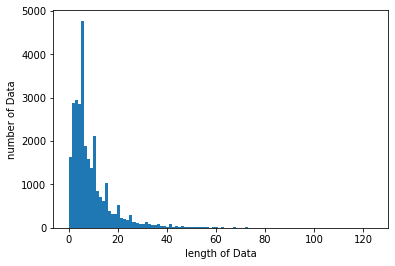

In [20]:
print('train 리뷰의 최대 길이 :',max(len(l) for l in X_token))
print('리뷰의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [21]:
max_len = 124
X_data = pad_sequences(X_token, maxlen=max_len)
print("data shape: ", X_data.shape)

data shape:  (29117, 124)


In [22]:
y_data = np.array(y_data).reshape(-1, 1)

In [23]:
print(type(X_data))
print(type(y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   55  734  742 1862   64  121    2  352 7823]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# 데이터 분리

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

In [26]:
print(X_train[:3])
print(y_train[:3]) 

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0   95   53  652]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# activation = ReLU 추가(loss: 0.0943 - acc: 0.9477)

In [27]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(64, 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split = 0.2)

Train on 16304 samples, validate on 4077 samples
Epoch 1/5
16304/16304 [==============================] - 117s 7ms/sample - loss: 0.3087 - acc: 0.8786 - val_loss: 0.1826 - val_acc: 0.9316
Epoch 2/5
16304/16304 [==============================] - 107s 7ms/sample - loss: 0.1585 - acc: 0.9473 - val_loss: 0.1641 - val_acc: 0.9370
Epoch 3/5
16304/16304 [==============================] - 111s 7ms/sample - loss: 0.1272 - acc: 0.9554 - val_loss: 0.1743 - val_acc: 0.9392
Epoch 4/5
16304/16304 [==============================] - 113s 7ms/sample - loss: 0.1290 - acc: 0.9566 - val_loss: 0.1483 - val_acc: 0.9421
Epoch 5/5
16304/16304 [==============================] - 112s 7ms/sample - loss: 0.1187 - acc: 0.9573 - val_loss: 0.1511 - val_acc: 0.9443


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 1,131,937
Trainable params: 1,131,937
Non-trainable params: 0
____________________________________________

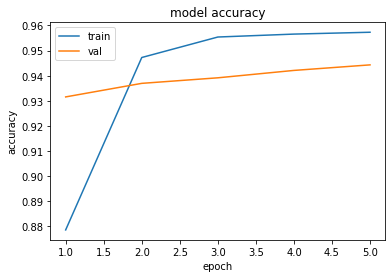

In [31]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

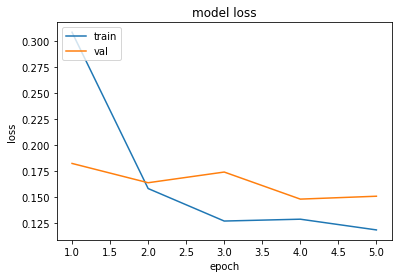

In [32]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

8736/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [34]:
model.save('C:\\Users\\user\\Documents\\GitHub\\grad_project\\model\\model8n.h5')